# Machine Learning Basic: Iris

In [1]:
from sklearn.datasets import load_iris
iris_dataset=load_iris()

In [3]:
type(iris_dataset)

sklearn.utils._bunch.Bunch

In [4]:
import pandas as pd

In [66]:
import numpy as np

- iris의 dataset은 단순히 로드하면 딕셔너리와 비슷한 Bunch 클래스의 객체로 키와 값으로 구성되어 있다.

In [10]:
type(iris_dataset)

sklearn.utils._bunch.Bunch

In [11]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
iris_dataset.values()

dict_values([array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
 

# Data set 살펴보기

## DESCR로 iris_dataset을 요약하여 살펴본다.

In [14]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## target_names와 feature_names를 확인한다.

In [18]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [16]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## data의 상태는 어떤가

- 아래 코드를 적용하면 data의 모양과 feature를 알 수 있다.
- feature의 이름은 앞에서 이미 구했다.

In [20]:
type(iris_dataset['data'])

numpy.ndarray

In [23]:
iris_dataset['data'].shape

(150, 4)

## target의 상태는 어떤가

- 아래 코드로 타입과 차원(여기서 target은 1차원)을 확인

In [24]:
type(iris_dataset['target'])

numpy.ndarray

In [25]:
iris_dataset['target'].shape

(150,)

# 기본적으로 train, test 해야함

- 모델 자체를 만드는 것은 train data
- 모델의 성능을 측정하기 위해서 이전과 다른 새 데이터로 적용해야 한다. 이를 test data

In [26]:
from sklearn.model_selection import train_test_split

- 앞서 살펴본 np.ndarray 타입의 데이터를 훈련을 시키자

In [32]:
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

- 디폴트는 train size=0.75, test size=0.25이다.

In [34]:
X_train.shape

(112, 4)

In [35]:
X_test.shape

(38, 4)

# 그래프로 그려보기 위하여 DataFrame으로 변환

- 우선 먼저 DataFrame으로 변환을 해야한다.

In [38]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [39]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- 여기서는 X train data set을 살펴보도록 한다

In [40]:
iris_dataframe=pd.DataFrame(X_train,columns=iris_dataset.feature_names)

In [41]:
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2


## 산점도로 데이터의 특성을 파악해 본다.

In [42]:
import matplotlib.pyplot as plt

### pd.plotting.scatter_matrix는 데이터 프레임을 이용해서 색으로 구분된 산점도 행렬을 만들 수 있음!

- plotting 해보면 세 클래스가 꽃잎과 꽃받침의 측정값에 따라 비교적 잘 구분된다는 사실을 확인할 수 있다.

array([[<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot: xlabel='sepal length (cm)', ylabel='p

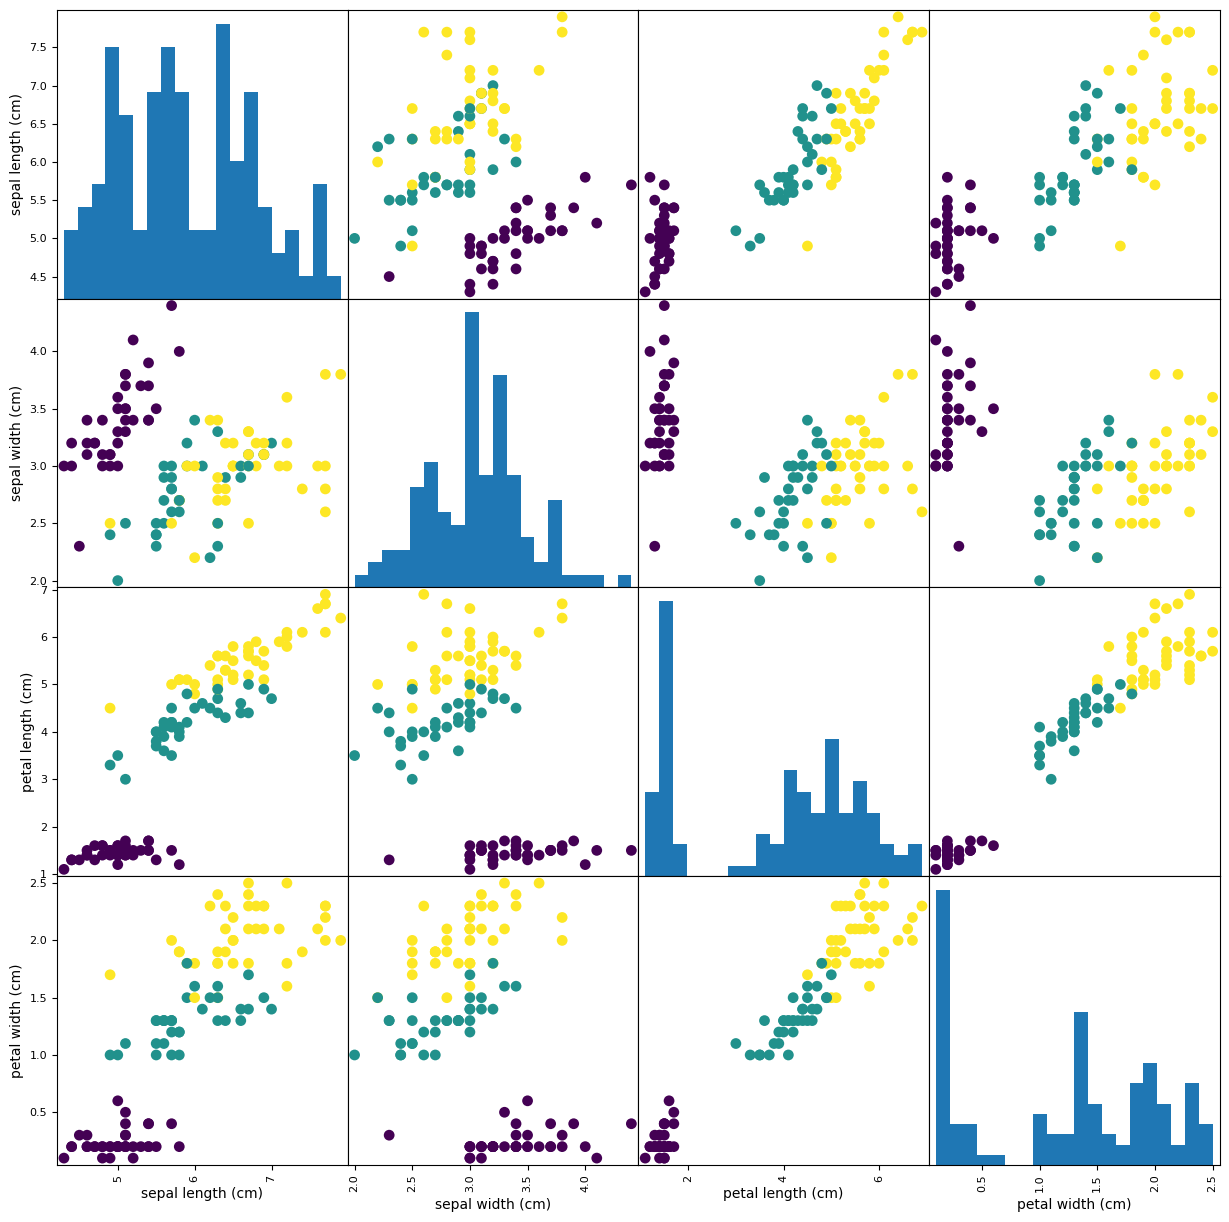

In [60]:
pd.plotting.scatter_matrix(iris_dataframe,c=y_train,marker='o',figsize=(15,15),hist_kwds={'bins':20},s=60,alpha=1)

# 모델적용:KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn=KNeighborsClassifier(n_neighbors=1)

## 학습

In [63]:
knn.fit(X=X_train,y=y_train)

KNeighborsClassifier(n_neighbors=1)

- 학습을 시킨 다음에는 이웃으로 지정한 수와 feature를 확인할 수 있다.

In [64]:
knn.kneighbors

<bound method KNeighborsMixin.kneighbors of KNeighborsClassifier(n_neighbors=1)>

In [65]:
knn.n_features_in_

4

## 예측

- 새로운 data를 넣어본다. 어떤 것으로 예측 하는가?

In [67]:
X_new=np.array([[5,2.9,1,0.2]])

In [68]:
prediction=knn.predict(X_new)

In [69]:
prediction

array([0])

In [75]:
print(iris_dataset['target_names'][prediction])

['setosa']


- 앞서 만들어진 모델은 클래스 0인 setosa로 예측을 했다. 과연 이 결과를 신뢰할 수 있을까?
- 여기서 만든 X_new의 정확한 품종을 모른다는 것이 중요한 의미를 가진다.

## 모델 평가하기

In [76]:
y_pred=knn.predict(X_test)

In [77]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

### np.mean() 으로 정확도 계산

In [79]:
np.mean(y_pred==y_test) # x_test에 대한 결과인 y_pred가 얼마나 y_test와 같은가?

0.9736842105263158

### 정 생각이 안날때는 이것도 가능함

In [81]:
print(y_pred==y_test)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False]


In [82]:
sum(y_pred==y_test)/len(y_pred)

0.9736842105263158

### knn 객체의 score 메서드를 사용

In [83]:
knn.score(X_test,y_test)

0.9736842105263158